In [147]:
import math
import pickle

import matplotlib.pyplot as plt

import networkx as nx
import pandas as pd
import numpy as np

from tqdm import tqdm

from pyvis.network import Network

from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier

In [2]:
def unique_list(pp):
    temp = []
    for p in pp:
        if p not in temp:
            temp.append(p)
    return temp

In [3]:
metrics = ['NCLOC', 'NEW_SQALE_DEBT_RATION', 'VIOLATIONS', 'CODE_SMELLS', 'FUNCTIONS', 'LINES', 'CLASSES', 'CLASS_COMPLEXITY']

In [4]:
projects = ['beanutils',
 'codec',
 'collections',
 'commons-cli',
 'commons-io',
 'commons-jelly',
 'commons-jexl',
 'configuration',
 'dbcp',
 'dbutils',
 'felix',
 'httpclient',
 'httpcore',
 'jxpath',
 'net',
 'santuario',
 'thrift',
 'vfs',
 'zookeeper']

In [50]:
for filename in tqdm(projects):
    r_addr = 'projects_c/'+filename+'_cl.csv'
    df = pd.read_csv(r_addr)
    df = df.drop('Unnamed: 0', axis=1)
    inducings = unique_list(list(df['FAULT_INDUCING_COMMIT_HASH']))
    temp = []
    for i in inducings:
        try:
            indices = df.index[df['COMMIT_HASH_ON_FILE_BEFORE_FIX'] == i]
            for index in indices:
                if index > 4:
                    if df.loc[index-5]['DATE_OF_COMMIT_HASH'] < df.loc[index-4]['DATE_OF_COMMIT_HASH'] and df.loc[index-4]['DATE_OF_COMMIT_HASH'] < df.loc[index-3]['DATE_OF_COMMIT_HASH']:
                        if df.loc[index-3]['DATE_OF_COMMIT_HASH'] < df.loc[index-2]['DATE_OF_COMMIT_HASH'] and df.loc[index-2]['DATE_OF_COMMIT_HASH'] < df.loc[index-1]['DATE_OF_COMMIT_HASH']:
                            if df.loc[index-1]['DATE_OF_COMMIT_HASH'] < df.loc[index]['DATE_OF_COMMIT_HASH']:
                                temp.append(pd.DataFrame(df.loc[index-5]).T)
                                temp.append(pd.DataFrame(df.loc[index-4]).T)
                                temp.append(pd.DataFrame(df.loc[index-3]).T)
                                temp.append(pd.DataFrame(df.loc[index-2]).T)
                                temp.append(pd.DataFrame(df.loc[index-1]).T)
                                temp.append(pd.DataFrame(df.loc[index]).T)
        except:
            pass
    res = pd.concat(temp)
    res.to_csv('final_db/'+filename+'.csv')
        

100%|█████████████████████████████████████████████████████████████████████████████████| 19/19 [46:26<00:00, 146.66s/it]


In [51]:
for filename in tqdm(projects):
    r_addr = 'projects_c/'+filename+'_cl_cmprs_out.csv'
    df = pd.read_csv(r_addr)
    df = df.drop('Unnamed: 0', axis=1)
    inducings = unique_list(list(df['FAULT_INDUCING_COMMIT_HASH']))
    temp = []
    for i in inducings:
        try:
            indices = df.index[df['COMMIT_HASH_ON_FILE_BEFORE_FIX'] == i]
            for index in indices:
                if index > 4:
                    if df.loc[index-5]['DATE_OF_COMMIT_HASH'] < df.loc[index-4]['DATE_OF_COMMIT_HASH'] and df.loc[index-4]['DATE_OF_COMMIT_HASH'] < df.loc[index-3]['DATE_OF_COMMIT_HASH']:
                        if df.loc[index-3]['DATE_OF_COMMIT_HASH'] < df.loc[index-2]['DATE_OF_COMMIT_HASH'] and df.loc[index-2]['DATE_OF_COMMIT_HASH'] < df.loc[index-1]['DATE_OF_COMMIT_HASH']:
                            if df.loc[index-1]['DATE_OF_COMMIT_HASH'] < df.loc[index]['DATE_OF_COMMIT_HASH']:
                                temp.append(pd.DataFrame(df.loc[index-5]).T)
                                temp.append(pd.DataFrame(df.loc[index-4]).T)
                                temp.append(pd.DataFrame(df.loc[index-3]).T)
                                temp.append(pd.DataFrame(df.loc[index-2]).T)
                                temp.append(pd.DataFrame(df.loc[index-1]).T)
                                temp.append(pd.DataFrame(df.loc[index]).T)
        except:
            pass
    res = pd.concat(temp)
    res.to_csv('final_db/'+filename+'2.csv')
        

100%|█████████████████████████████████████████████████████████████████████████████████| 19/19 [44:06<00:00, 139.27s/it]


In [48]:
for filename in tqdm(projects):
    r_addr = 'final_db/'+filename+'.csv'
    df = pd.read_csv(r_addr)
    df = df.drop('Unnamed: 0', axis=1)
    df['VECTOR'] = [None for _ in range(len(df))]
    for i in range(len(df)):
        vec = ""
        for metric in ['NEW_SQALE_DEBT_RATION_d_pc', 'VIOLATIONS_d_pc', 'CODE_SMELLS_d_pc', 'CLASS_COMPLEXITY_d_pc']:
            for j in [0, 1, 2, 3, 4]:
                if df.iloc[i][metric] == j:
                    vec += str(j)
        df['VECTOR'][i] = vec
    df.to_csv('final_db/'+filename+'_vd.csv')

  0%|                                                                                           | 0/19 [00:00<?, ?it/s]C:\Users\atavakko\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == "":
100%|███████████████████████████████████████████████████████████████████████████████| 19/19 [1:22:22<00:00, 260.16s/it]


In [49]:
for filename in tqdm(projects):
    r_addr = 'final_db/'+filename+'2.csv'
    df = pd.read_csv(r_addr)
    df = df.drop('Unnamed: 0', axis=1)
    df['VECTOR'] = [None for _ in range(len(df))]
    for i in range(len(df)):
        vec = ""
        for metric in ['NEW_SQALE_DEBT_RATION_d_pc', 'VIOLATIONS_d_pc', 'CODE_SMELLS_d_pc', 'CLASS_COMPLEXITY_d_pc']:
            for j in [0, 1, 2, 3, 4]:
                if df.iloc[i][metric] == j:
                    vec += str(j)
        df['VECTOR'][i] = vec
    df.to_csv('final_db/'+filename+'_vd2.csv')

  0%|                                                                                           | 0/19 [00:00<?, ?it/s]C:\Users\atavakko\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == "":
100%|███████████████████████████████████████████████████████████████████████████████| 19/19 [1:51:45<00:00, 352.90s/it]


In [54]:
dic = {5: [], 4: [], 3: [], 2: [], 1: [], 'inducing': []}
for filename in tqdm(projects):
    r_addr = 'final_db/'+filename+'_vd.csv'
    df = pd.read_csv(r_addr)
    df = df.drop('Unnamed: 0', axis=1)
    for i in range(len(df)):
        if (i+1)%6 == 0:
            dic['inducing'].append(df.iloc[i]['VECTOR'])
        else:
            dic[(i+1)%6].append(df.iloc[i]['VECTOR'])
res = pd.DataFrame(dic)
res.to_csv('final_db/Zvectors.csv')

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [02:22<00:00,  7.50s/it]


In [55]:
dic = {5: [], 4: [], 3: [], 2: [], 1: [], 'inducing': []}
for filename in tqdm(projects):
    r_addr = 'final_db/'+filename+'_vd2.csv'
    df = pd.read_csv(r_addr)
    df = df.drop('Unnamed: 0', axis=1)
    for i in range(len(df)):
        if (i+1)%6 == 0:
            dic['inducing'].append(df.iloc[i]['VECTOR'])
        else:
            dic[(i+1)%6].append(df.iloc[i]['VECTOR'])
res = pd.DataFrame(dic)
res.to_csv('final_db/Zvectors2.csv')

100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [02:10<00:00,  6.84s/it]


In [56]:
df = pd.read_csv('final_db/Zvectors.csv')
df = df.drop('Unnamed: 0', axis=1)
df = df.dropna(axis=0, how='any')
df.to_csv('final_db/Zvectors_nonnan.csv')

In [57]:
df = pd.read_csv('final_db/Zvectors2.csv')
df = df.drop('Unnamed: 0', axis=1)
df = df.dropna(axis=0, how='any')
df.to_csv('final_db/Zvectors2_nonnan.csv')

In [58]:
counter = {}
for filename in tqdm(projects):
    r_addr = 'final_db/'+filename+'_vd.csv'
    df = pd.read_csv(r_addr)
    df = df.drop('Unnamed: 0', axis=1)
    for i in range(len(df)):
        if (i+1)%6 != 0:
            if df.iloc[i]['VECTOR'] not in list(counter.keys()):
                counter[df.iloc[i]['VECTOR']] = [df.iloc[i+1]['VECTOR']]
            else:
                counter[df.iloc[i]['VECTOR']].append(df.iloc[i+1]['VECTOR'])
                
with open('ones.pickle', 'wb') as handle:
    pickle.dump(counter, handle, protocol=pickle.HIGHEST_PROTOCOL)

100%|███████████████████████████████████████████████████████████████████████████████| 19/19 [1:08:35<00:00, 216.63s/it]


In [ ]:
counter = {}
for filename in tqdm(projects):
    r_addr = 'final_db/'+filename+'_vd2.csv'
    df = pd.read_csv(r_addr)
    df = df.drop('Unnamed: 0', axis=1)
    for i in range(len(df)):
        if (i+1)%6 != 0:
            if df.iloc[i]['VECTOR'] not in list(counter.keys()):
                counter[df.iloc[i]['VECTOR']] = [df.iloc[i+1]['VECTOR']]
            else:
                counter[df.iloc[i]['VECTOR']].append(df.iloc[i+1]['VECTOR'])

with open('ones2.pickle', 'wb') as handle:
    pickle.dump(counter, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [73]:
df = pd.read_csv('final_db/Zvectors_nonnan.csv')
df = df.drop('Unnamed: 0', axis=1)
df = df.drop_duplicates()
df.to_csv('final_db/Zvectors_clean.csv')

,5,4,3,2,1,inducing
0,1333.0,2113.0,1221.0,2333.0,2.0,4444.0
1,1333.0,2113.0,1221.0,2333.0,2.0,4444.0
2,1333.0,1221.0,1223.0,444.0,1221.0,4002.0
3,1333.0,1221.0,1223.0,444.0,1221.0,4002.0
4,3002.0,1333.0,2112.0,1221.0,2113.0,3002.0
...,...,...,...,...,...,...
95933,1112.0,1003.0,113.0,1222.0,4232.0,3112.0
95934,1112.0,1003.0,113.0,1222.0,4232.0,3112.0
95935,1112.0,1003.0,113.0,1222.0,4232.0,3112.0
95936,1112.0,1003.0,113.0,1222.0,4232.0,3112.0


In [77]:
df = pd.read_csv('final_db/Zvectors2_nonnan.csv')
df = df.drop('Unnamed: 0', axis=1)
df = df.drop_duplicates()
df.to_csv('final_db/Zvectors2_clean.csv')

In [83]:
df1 = pd.read_csv('final_db/Zvectors_clean.csv')
df1 = df1.drop('Unnamed: 0', axis=1)

df2 = pd.read_csv('final_db/Zvectors2_clean.csv')
df2 = df2.drop('Unnamed: 0', axis=1)

res = pd.concat([df1, df2])

res = res.drop_duplicates()

res.to_csv('final_db/Zvectors_final.csv')

In [93]:
with open('ones.pickle', 'rb') as handle:
    counter1 = pickle.load(handle)

with open('ones2.pickle', 'rb') as handle:
    counter2 = pickle.load(handle)

In [103]:
c_keys = [i for i in list(counter1.keys()) if str(i) != 'nan']

c_c1 = {}
for k in c_keys:
    c_c1[k] = [i for i in counter1[k] if str(i) != 'nan']
    
# with open('clean_map.pickle', 'wb') as handle:
#     pickle.dump(c_c1, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [104]:
c_keys = [i for i in list(counter2.keys()) if str(i) != 'nan']

c_c2 = {}
for k in c_keys:
    c_c2[k] = [i for i in counter2[k] if str(i) != 'nan']
    
# with open('clean_map2.pickle', 'wb') as handle:
#     pickle.dump(c_c1, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [114]:
k1 = list(c_c1.keys())
k2 = list(c_c2.keys())

res = {}
for k in k1:
    if k in k2:
        res[k] = []
        res[k].extend(c_c1[k])
        res[k].extend(c_c2[k])
    else:
        res[k] = c_c1[k]
        
for k in k2:
    if k not in k1:
        res[k] = c_c2[k]
        
# with open('map.pickle', 'wb') as handle:
#     pickle.dump(res, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [117]:
freq = {}
for k in list(res.keys()):
    temp = []
    for e in res[k]:
        path = str(int(k))+'-'+str(int(e))
        if e not in temp:
            temp.append(e)
            freq[path] = 1
        else:
            freq[path] += 1

In [131]:
road = {}
for k in list(res.keys()):
    temp = {}
    for e in res[k]:
        if e in list(temp.keys()):
            temp[int(e)] += 1
        else:
            temp[int(e)] = 1
    road[int(k)] = temp

In [132]:
road

{2: {2333: 2,
  112: 56,
  2: 92,
  3112: 148,
  2112: 33,
  2002: 132,
  1333: 3,
  4440: 186,
  1443: 2,
  222: 4,
  4443: 207,
  4221: 27,
  4121: 4,
  4430: 5,
  2440: 1,
  1: 19,
  4431: 1,
  1002: 179,
  4001: 12,
  1222: 8,
  3222: 71,
  4442: 59,
  3001: 8,
  2222: 303,
  4441: 130,
  3002: 24,
  4332: 94,
  3223: 93,
  4331: 132,
  4002: 21,
  440: 14,
  1102: 34,
  3333: 3,
  3331: 1,
  2110: 6,
  4222: 6,
  4444: 55,
  3111: 137,
  2111: 33,
  443: 52,
  3332: 8,
  1114: 1,
  434: 1,
  2113: 2,
  1223: 1,
  321: 4,
  1112: 3,
  442: 7,
  1000: 2,
  3000: 1,
  2223: 12,
  212: 1,
  1111: 3,
  2221: 9,
  1001: 11,
  1334: 1,
  2003: 8,
  4231: 1,
  4110: 1,
  4330: 3,
  0: 1,
  4111: 4,
  1331: 5,
  1231: 8,
  2121: 1,
  1221: 12,
  1440: 1,
  322: 2,
  2001: 4,
  1003: 2,
  11: 21,
  4003: 2,
  3224: 7,
  331: 1,
  111: 2,
  221: 1,
  4112: 7},
 2333: {1221: 2,
  3222: 19,
  1112: 4,
  112: 2,
  4332: 30,
  3333: 3,
  4443: 18,
  3441: 11,
  444: 3,
  4002: 1,
  3213: 1,
  13

In [133]:
with open('freq.pickle', 'wb') as handle:
    pickle.dump(freq, handle)

In [134]:
with open('road.pickle', 'wb') as handle:
    pickle.dump(road, handle)

In [139]:
tups = []
for k in list(res.keys()):
    for e in res[k]:
        tup = (int(k), int(e))
        if tup not in tups:
            tups.append(tup)
            
len(tups)

5417

In [156]:
with open('tups.pickle', 'wb') as handle:
    pickle.dump(tups, handle)

In [142]:
tups[0][1]

2333

AssertionError: 

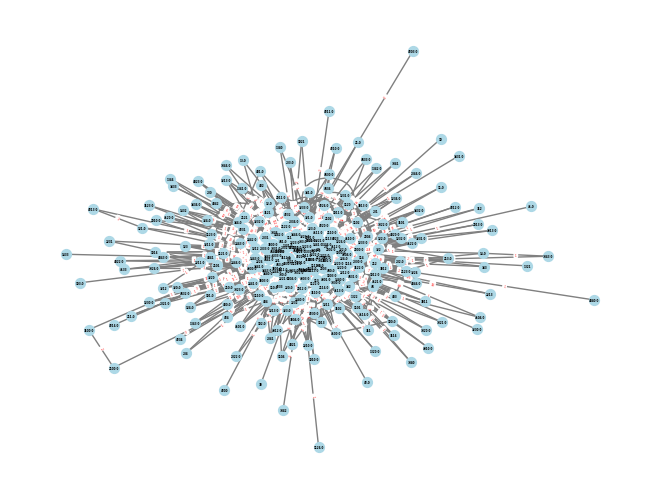

In [151]:
# Create a graph object
G = nx.Graph()

# Define a list of nodes (replace with your actual data)
nodes = list(res.keys())

# Define a list of edges as tuples (replace with your actual data)
edges = tups

# Convert node IDs to strings if they are not already
nodes = [str(node) for node in nodes]

# Add nodes to the graph
G.add_nodes_from(nodes)

# Add edges to the graph
G.add_edges_from(edges)

# Create an interactive network visualization
nt = Network(height="500px", width="100%", notebook=True)
nt.from_nx(G)

# You can add edge labels (optional) using nt.barnes_hut() or other layout algorithms
# Example:
# nt.barnes_hut()
# edge_labels = {(n1, n2): road[n1][n2] for n1, n2 in G.edges()}
# nt.show_buttons(filter_=['nodes', 'edges', 'physics'])
# nt.show('large_graph.html')

# Show the visualization with zoom in/out functionality
nt.show_buttons(filter_=['zoom_in', 'zoom_out'])
nt.show('large_graph.html')
